In [45]:
import re
import unicodedata
import pandas as pd
import nltk
from afinn import Afinn

from typing import List

from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import prepare as p

Spam Data

Load the spam data set.

Create and explore bigrams for the spam data. Visualize them with a word cloud.

How do they compare with the ham bigrams?

Is there any overlap in the bigrams for the spam data and the ham data?

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
df = pd.read_csv('spam_clean.csv')

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Create and explore bigrams for the spam data. 

Visualize them with a word cloud.

In [4]:
def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [6]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [7]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [8]:
pd.Series(nltk.bigrams(all_words)).head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [9]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts().head(20))

In [10]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts().head(20))

In [11]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

In [12]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(chance, win)           19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(sae, tc)               16
(account, statement)    16
(prize, claim)          16
(call, mobileupd8)      15
dtype: int64

In [13]:
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(last, night)      18
(wat, time)        18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
dtype: int64

Text(0.5, 0, '# Occurances')

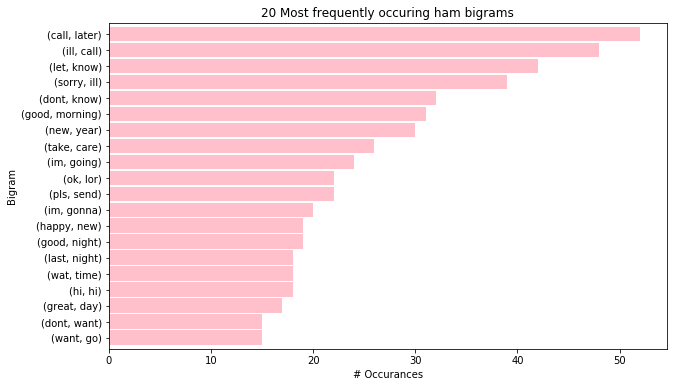

In [64]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

Text(0.5, 0, '# Occurances')

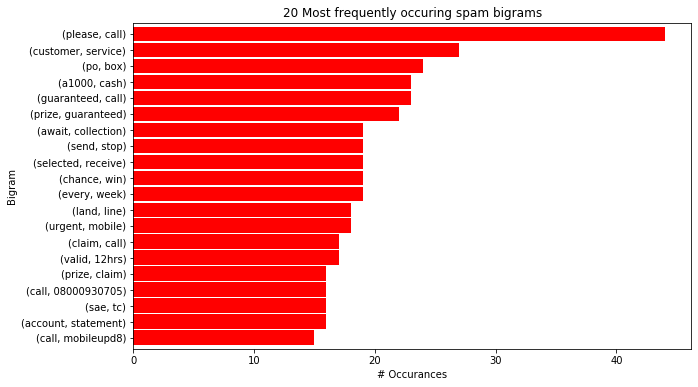

In [15]:
top_20_spam_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

In [16]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='green', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='black', height=600, width=800).generate(' '.join(spam_words))

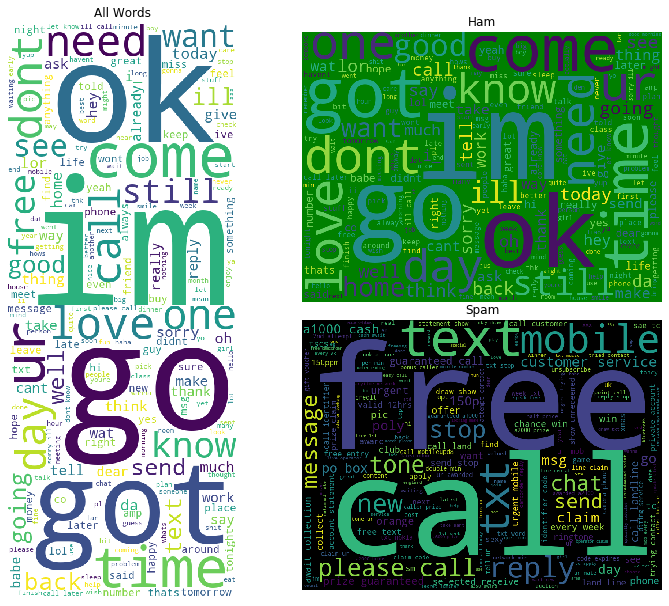

In [17]:
plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

Is there any overlap in the bigrams for the spam data and the ham data?

In [18]:
ham_bigrams = set((pd.Series(nltk.ngrams(ham_words, 2))))

In [19]:
spam_bigrams = set((pd.Series(nltk.ngrams(spam_words, 2))))

In [20]:
len(spam_bigrams)

6886

In [21]:
len(ham_bigrams)

30869

In [22]:
len(ham_bigrams.intersection(spam_bigrams))

184

### There are 184 total overlaps

In [23]:
set(top_20_ham_bigrams.index) - set(top_20_ham_bigrams.index)

set()

### None in the top 20

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [24]:
ham_trigrams = set((pd.Series(nltk.ngrams(ham_words, 3))))

In [25]:
spam_trigrams = set((pd.Series(nltk.ngrams(spam_words, 3))))

In [26]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts().head(20))

In [27]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts().head(20))

In [28]:
len(ham_trigrams)

35254

In [29]:
len(spam_trigrams)

8112

In [30]:
len(ham_trigrams.intersection(spam_trigrams))

5

In [31]:
set(top_20_ham_trigrams.index) - set(top_20_ham_trigrams.index)

set()

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [32]:
df = p.prep_article(a.get_news_articles())

In [41]:
df.head()

,category,title,original,stemmed,lemmatized,clean
0,business,RBI keeps repo rate unchanged at 5.15% after f...,The RBI on Thursday kept the repo rate unchang...,the rbi on thursday kept the repo rate unchang...,the rbi on thursday kept the repo rate unchang...,rbi thursday kept repo rate unchanged five cut...
1,business,"8, 7, 6.6, 5.8, 5 & 4.5 is the state of econom...",Former Finance Minister P Chidambaram on Thurs...,former financ minist p chidambaram on thursday...,former finance minister p chidambaram on thurs...,former finance minister p chidambaram thursday...
2,business,Google Co-founders gain $2.3B after Sundar Pic...,Google Co-founders Sergey Brin and Larry Page ...,googl cofound sergey brin and larri page ad a ...,google cofounder sergey brin and larry page ad...,google cofounders sergey brin larry page added...
3,business,Sundar Pichai rejected Google shares worth mil...,Google's 47-year-old India-born CEO Sundar Pic...,google' 47yearold indiaborn ceo sundar pichai ...,google's 47yearold indiaborn ceo sundar pichai...,google's 47yearold indiaborn ceo sundar pichai...
4,business,Gut feeling drove me to invest $20M in Alibaba...,"SoftBank Founder and CEO Masayoshi Son, in a d...",softbank founder and ceo masayoshi son in a di...,softbank founder and ceo masayoshi son in a di...,softbank founder ceo masayoshi son discussion ...


In [35]:
df.category.value_counts()

technology       25
entertainment    25
sports           25
business         25
Name: category, dtype: int64

In [47]:
news = " ".join(df.clean)
technology = " ".join(df.clean[df.category == "technology"])
entertainment = " ".join(df.clean[df.category == "entertainment"])
sports = " ".join(df.clean[df.category == "sports"])
business = " ".join(df.clean[df.category == "entertainment"])

In [48]:
news_freq = pd.Series(all_words).value_counts()
tech_freq = pd.Series(spam_words).value_counts()
ent_freq = pd.Series(ham_words).value_counts()
spor_freq = pd.Series(ham_words).value_counts()
buis_freq = pd.Series(ham_words).value_counts()

In [49]:
sa = Afinn()

In [50]:
df["afinn_sentiment"] = df.clean.apply(sa.score)

In [51]:
df.head()

,category,title,original,stemmed,lemmatized,clean,afinn_sentiment
0,business,RBI keeps repo rate unchanged at 5.15% after f...,The RBI on Thursday kept the repo rate unchang...,the rbi on thursday kept the repo rate unchang...,the rbi on thursday kept the repo rate unchang...,rbi thursday kept repo rate unchanged five cut...,-2.0
1,business,"8, 7, 6.6, 5.8, 5 & 4.5 is the state of econom...",Former Finance Minister P Chidambaram on Thurs...,former financ minist p chidambaram on thursday...,former finance minister p chidambaram on thurs...,former finance minister p chidambaram thursday...,9.0
2,business,Google Co-founders gain $2.3B after Sundar Pic...,Google Co-founders Sergey Brin and Larry Page ...,googl cofound sergey brin and larri page ad a ...,google cofounder sergey brin and larry page ad...,google cofounders sergey brin larry page added...,2.0
3,business,Sundar Pichai rejected Google shares worth mil...,Google's 47-year-old India-born CEO Sundar Pic...,google' 47yearold indiaborn ceo sundar pichai ...,google's 47yearold indiaborn ceo sundar pichai...,google's 47yearold indiaborn ceo sundar pichai...,4.0
4,business,Gut feeling drove me to invest $20M in Alibaba...,"SoftBank Founder and CEO Masayoshi Son, in a d...",softbank founder and ceo masayoshi son in a di...,softbank founder and ceo masayoshi son in a di...,softbank founder ceo masayoshi son discussion ...,3.0


In [55]:
df.groupby('category').describe()

afinn_sentiment                                           
                        count  mean       std   min  25%  50%  75%   max
category                                                                
business                 25.0  1.08  4.271222  -9.0 -1.0  0.0  4.0   9.0
entertainment            25.0 -1.08  4.526956 -11.0 -4.0  0.0  2.0   5.0
sports                   25.0  0.28  3.494281  -7.0 -3.0  1.0  3.0   6.0
technology               25.0 -0.68  5.662155 -17.0 -3.0  0.0  2.0  10.0

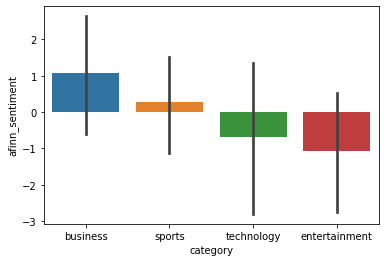

In [62]:
sns.barplot(x=df.category, y=df.afinn_sentiment, data=df.groupby('category').mean())

In [59]:
df.groupby('category').mean()

,afinn_sentiment
category,
business,1.08
entertainment,-1.08
sports,0.28
technology,-0.68


In [66]:
df.groupby('category').median()

,afinn_sentiment
category,
business,0.0
entertainment,0.0
sports,1.0
technology,0.0


In [73]:
df.afinn_sentiment[df.afinn_sentiment ==0].count()

11